In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import glob
import librosa.display
import scipy.io.wavfile
import numpy as np
import sys
import time
import itertools
from sklearn.utils import shuffle

In [ ]:
main_path="/content/drive/MyDrive/All_audios"
mylist = os.listdir(main_path)
print(mylist)
print(len(mylist))

['03-01-05-01-02-02-23.wav', '03-01-03-02-02-01-23.wav', '03-01-04-02-01-02-23.wav', '03-01-03-02-01-01-23.wav', '03-01-04-01-01-01-23.wav', '03-01-03-01-02-02-23.wav', '03-01-04-01-01-02-23.wav', '03-01-05-01-01-02-23.wav', '03-01-04-02-02-02-23.wav', '03-01-06-02-01-01-23.wav', '03-01-06-01-01-02-23.wav', '03-01-07-02-02-01-23.wav', '03-01-07-01-02-02-23.wav', '03-01-05-02-02-01-23.wav', '03-01-06-01-01-01-23.wav', '03-01-07-02-02-02-23.wav', '03-01-05-02-02-02-23.wav', '03-01-07-01-01-02-23.wav', '03-01-07-01-02-01-23.wav', '03-01-07-02-01-01-23.wav', '03-01-08-01-02-01-23.wav', '03-01-06-02-01-02-23.wav', '03-01-07-02-01-02-23.wav', '03-01-06-01-02-01-23.wav', '03-01-06-02-02-02-23.wav', '03-01-05-02-01-02-23.wav', '03-01-06-01-02-02-23.wav', '03-01-06-02-02-01-23.wav', '03-01-07-01-01-01-23.wav', '03-01-08-01-01-02-23.wav', '03-01-08-01-01-01-23.wav', '03-01-01-01-02-02-24.wav', '03-01-02-01-02-02-24.wav', '03-01-08-02-02-02-23.wav', '03-01-02-01-02-01-24.wav', '03-01-08-02-02-01-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print(mylist[50])

03-01-02-02-02-01-24.wav


In [ ]:
print(mylist[400][6:-16])

07


In [ ]:
data, sampling_rate = librosa.load(main_path+'/'+mylist[0])

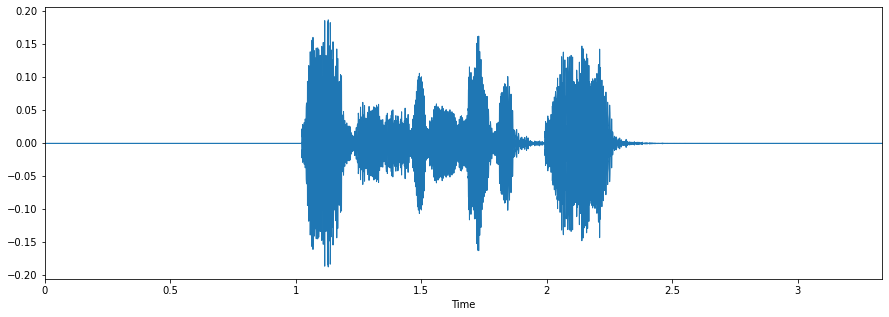

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

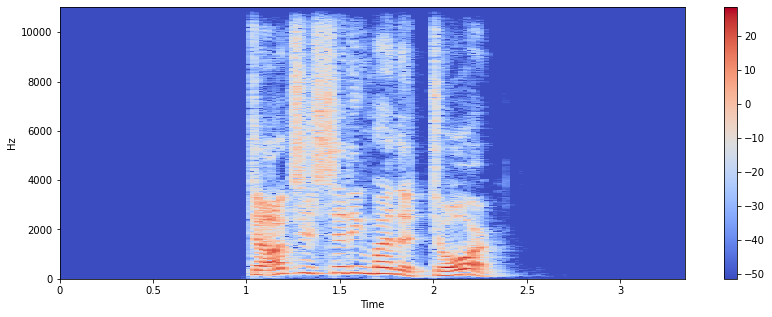

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

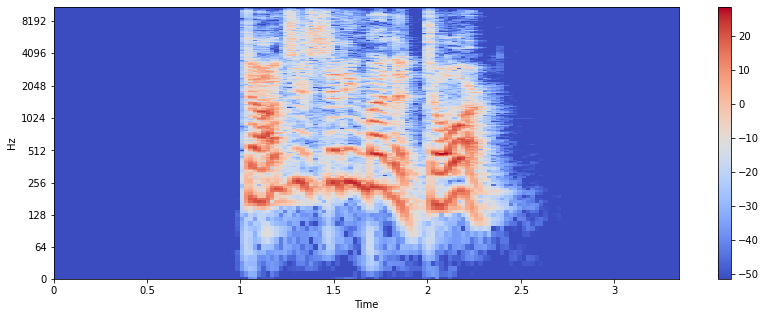

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
feeling_list=[]
filtered_file = []
map = {('02',0):'female_calm',('02',1):'male_calm',('03',0):'female_happy',('03',1):'male_happy',('04',0):'female_sad',('04',1):'male_sad',
       ('05',0):'female_angry',('05',1):'male_angry',('06',0):'female_fearful',('06',1):'male_fearful',
        'a':'male_angry','f':'male_fearful','h':'male_happy','sa':'male_sad'}
for item in mylist:
    if len(item)==24 and (item[6:-16],int(item[18:-4])%2) in map:
      feeling_list.append(map[(item[6:-16],int(item[18:-4])%2)])
      filtered_file.append(item)
    elif len(item)!=24 and item[:1] in map:
      feeling_list.append(map[item[:1]])
      filtered_file.append(item)
    elif len(item)!=24 and item[:2] in map:
        feeling_list.append(map[item[:2]])
        filtered_file.append(item)

print(len(feeling_list))
print(len(filtered_file))

1020
1020


In [ ]:
labels = pd.DataFrame({'label': feeling_list})

In [ ]:
print(len(labels))
labels[:10]

1020


,label
0,male_angry
1,male_happy
2,male_sad
3,male_happy
4,male_sad
5,male_happy
6,male_sad
7,male_angry
8,male_sad
9,male_fearful


In [ ]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
start_time = time.time()
for index,y in enumerate(filtered_file):
  X, sample_rate = librosa.load(main_path+'/'+y, res_type='kaiser_best',duration=2.5,sr=22050*2,offset=0.5)
  sample_rate = np.array(sample_rate)

  mfcc_feature = librosa.feature.mfcc(y=X, sr=sample_rate,dct_type=2,norm='ortho', n_mfcc=15)
  mfccs = np.mean(mfcc_feature,axis=0)

  zero_cross = librosa.feature.zero_crossing_rate(y=X,center=True)
  zero_cross_s = zero_cross[0]
  stft = librosa.stft(X)
  energy = librosa.feature.rmse(S= stft)
  energys = energy[0]
  pitches, magnitudes = librosa.piptrack(S=stft,sr=sampling_rate)
  print(pitches)
  spectral_centroid = librosa.feature.spectral_centroid(y=X,sr=sampling_rate)
  spectral_centroids = spectral_centroid[0]

  feature = list(itertools.chain(mfccs,zero_cross_s,energys,spectral_centroids))
  df.loc[bookmark] = [feature]
  bookmark=bookmark+1  
  break     
end_time = time.time()
print("Time taken: ", end_time - start_time)

In [ ]:
df.head()

,feature
0,"[-48.055794204491896, -48.055794204491896, -48..."
1,"[-44.24039549841543, -44.24039549841543, -44.2..."
2,"[-51.93657294032105, -51.93657294032105, -51.9..."
3,"[-43.98098322101077, -43.98098322101077, -43.9..."
4,"[-59.518099272132645, -59.518099272132645, -59..."


In [ ]:
dff = pd.DataFrame(df['feature'].values.tolist())

In [ ]:
print(len(dff))

1020


In [ ]:
dff.fillna(0,inplace=True) 

In [ ]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863
0,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-47.966930,...,3377.452130,3363.827237,3406.708918,3614.139524,3619.329184,3548.371138,3680.788401,3857.285396,4038.345336,4015.894660,3940.438870,3954.504178,3619.900415,3660.802279,3977.784329,3975.667069,3903.890279,4282.066183,4077.155199,4039.917776,4235.049511,4232.362305,4230.318764,4245.647775,4539.031155,4333.912762,4271.961854,4224.805468,3916.195004,3869.250892,4851.518729,4948.980479,4440.146262,3922.947448,4112.025479,4327.857609,4758.786904,4961.782860,4882.750369,5165.194330
1,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.276995,-44.103756,-44.328201,-43.950448,...,4025.593008,3784.272330,3614.994739,3527.158334,3998.989683,4139.813296,4160.995178,3905.002031,3977.635116,3811.484865,4044.763782,4264.718860,3618.124428,4116.261705,4289.055329,3855.376298,3979.173505,4305.705700,4358.994885,4364.190510,4162.646361,4118.126928,4168.807231,4126.945754,4331.641919,4522.331469,4377.846215,4516.173546,4789.925966,4812.086114,4988.256114,4893.312177,4787.976125,4893.403665,4672.667173,4842.829929,5146.551646,5046.506217,5010.771827,5357.803480
2,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.131108,-50.421892,-49.894467,-49.524433,-48.898695,-49.478236,-50.490715,-51.130139,-50.355331,-50.007299,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-48.690124,-45.940415,-46.955960,-48.649449,-49.800675,-49.875484,-50.051403,-50.502409,-49.757399,...,2536.241311,2833.574950,2365.795448,1269.718138,908.320152,728.364078,575.694370,532.215178,531.318971,544.170275,565.511299,481.375887,631.640582,943.899211,1099.178226,1141.346099,1116.020745,1049.315542,1034.950417,1125.483659,1340.060500,1234.990968,1101.808554,1053.783293,981.588789,1074.062638,1098.700107,1172.197849,1086.200956,918.175310,1012.205022,1319.746174,1681.225335,2114.483893,1896.917623,1167.119209,954.848478,1000.628310,911.033610,658.957220
3,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,...,3688.491352,3619.391246,3512.138139,3487.868768,3192.908200,3245.360394,3614.633825,3444.706669,3641.360780,3779.389678,4058.822010,4010.704046,3844.537852,3919.791705,3757.146706,3634.748270,3822.271474,3958.507753,4135.782716,3878.121056,4088.685593,4214.115134,4322.967086,4040.013127,3992.809803,4084.297007,4413.582125,4115.160889,4065.670658,4141.456975,4029.880249,4152.660557,4098.153385,4408.794367,4213.036511,4137.031986,4206.023859,4319.617553,4228.163917,4009.306221
4,-59.518099,-59.518099,-59.518099,-

In [ ]:
dff = pd.concat([dff,labels], axis=1)

In [ ]:
dff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,label
0,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-48.055794,-47.966930,...,3363.827237,3406.708918,3614.139524,3619.329184,3548.371138,3680.788401,3857.285396,4038.345336,4015.894660,3940.438870,3954.504178,3619.900415,3660.802279,3977.784329,3975.667069,3903.890279,4282.066183,4077.155199,4039.917776,4235.049511,4232.362305,4230.318764,4245.647775,4539.031155,4333.912762,4271.961854,4224.805468,3916.195004,3869.250892,4851.518729,4948.980479,4440.146262,3922.947448,4112.025479,4327.857609,4758.786904,4961.782860,4882.750369,5165.194330,male_angry
1,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.240395,-44.276995,-44.103756,-44.328201,-43.950448,...,3784.272330,3614.994739,3527.158334,3998.989683,4139.813296,4160.995178,3905.002031,3977.635116,3811.484865,4044.763782,4264.718860,3618.124428,4116.261705,4289.055329,3855.376298,3979.173505,4305.705700,4358.994885,4364.190510,4162.646361,4118.126928,4168.807231,4126.945754,4331.641919,4522.331469,4377.846215,4516.173546,4789.925966,4812.086114,4988.256114,4893.312177,4787.976125,4893.403665,4672.667173,4842.829929,5146.551646,5046.506217,5010.771827,5357.803480,male_happy
2,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.131108,-50.421892,-49.894467,-49.524433,-48.898695,-49.478236,-50.490715,-51.130139,-50.355331,-50.007299,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-51.936573,-48.690124,-45.940415,-46.955960,-48.649449,-49.800675,-49.875484,-50.051403,-50.502409,-49.757399,...,2833.574950,2365.795448,1269.718138,908.320152,728.364078,575.694370,532.215178,531.318971,544.170275,565.511299,481.375887,631.640582,943.899211,1099.178226,1141.346099,1116.020745,1049.315542,1034.950417,1125.483659,1340.060500,1234.990968,1101.808554,1053.783293,981.588789,1074.062638,1098.700107,1172.197849,1086.200956,918.175310,1012.205022,1319.746174,1681.225335,2114.483893,1896.917623,1167.119209,954.848478,1000.628310,911.033610,658.957220,male_sad
3,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,-43.980983,...,3619.391246,3512.138139,3487.868768,3192.908200,3245.360394,3614.633825,3444.706669,3641.360780,3779.389678,4058.822010,4010.704046,3844.537852,3919.791705,3757.146706,3634.748270,3822.271474,3958.507753,4135.782716,3878.121056,4088.685593,4214.115134,4322.967086,4040.013127,3992.809803,4084.297007,4413.582125,4115.160889,4065.670658,4141.456975,4029.880249,4152.660557,4098.153385,4408.794367,4213.036511,4137.031986,4206.023859,4319.617553,4228.163917,4009.306221,male_happy
4,-59.518099,-59.518099,-59.518099,-59.5

In [ ]:
rdf = shuffle(dff)
rdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,label
698,-46.897431,-46.332689,-44.819764,-45.124409,-46.651321,-47.107676,-45.296048,-43.798621,-43.981738,-43.005629,-43.230869,-44.364241,-42.342453,-41.463621,-40.693285,-39.661437,-40.351780,-40.448924,-40.523408,-40.996468,-40.558977,-41.801621,-41.938614,-42.167506,-42.760845,-43.647589,-45.741470,-44.832901,-43.769577,-43.677912,-43.746392,-44.189102,-45.076116,-44.632666,-44.153190,-42.928774,-41.382291,-40.711715,-41.774333,-41.321759,...,1065.364600,1000.739597,924.601536,913.818572,952.928941,1109.866572,1157.851786,999.733291,821.757434,746.476334,706.954111,692.534253,662.694538,640.312752,679.942818,613.528302,604.474621,572.562735,627.945138,664.054463,660.171352,691.220580,724.572812,853.325402,1066.097128,1210.954515,1385.786362,1373.372695,1458.731138,1640.676536,1709.342601,1800.975761,1720.593763,1523.164333,1513.540984,1973.966880,2245.449624,1950.316214,1876.333244,male_happy
889,-38.434042,-35.628218,-36.291173,-36.063258,-35.985183,-35.055155,-33.070821,-31.767517,-31.537772,-32.411249,-34.275515,-33.492070,-35.924200,-37.528827,-35.082891,-35.688949,-37.642037,-38.972333,-39.221691,-37.336136,-37.347537,-35.941982,-36.728045,-36.864096,-35.460678,-34.727773,-34.415555,-33.312991,-31.045676,-31.472448,-32.722220,-34.514235,-34.845141,-30.775487,-28.990652,-28.788738,-29.715600,-28.275345,-30.954756,-33.855344,...,957.072413,914.835599,851.274785,762.585480,755.812840,687.649979,702.586610,718.319143,730.252110,745.260624,800.539420,890.239810,946.874126,1030.908924,1228.650520,1274.195944,1398.235560,1638.757727,1918.053380,2085.527940,2227.528728,2272.213978,2272.094603,2569.461725,2690.467044,2747.291632,2609.929507,2341.292745,2401.850936,2862.991484,3237.629675,3109.618249,3014.205918,3114.320968,3312.950307,3339.738043,3485.836034,3258.370260,2934.276779,male_fearful
771,-47.251630,-48.209397,-49.080739,-49.384780,-48.511317,-46.881980,-46.732088,-48.214656,-50.358723,-49.028126,-50.198766,-51.729989,-51.580199,-49.643498,-48.621637,-49.414877,-51.344604,-52.859225,-52.859225,-52.859225,-52.859225,-52.859225,-52.859225,-52.458829,-50.243568,-49.056856,-48.013495,-47.863036,-47.998454,-47.697213,-47.889743,-48.789997,-48.577277,-49.421120,-49.815130,-49.676281,-48.582351,-46.492229,-46.530480,-42.809786,...,2289.166256,3263.405348,3147.783615,1759.671341,1184.105141,1098.565967,1114.406122,1149.617083,1215.273910,1309.524350,868.567952,696.954707,626.551599,751.866446,949.213134,1088.440238,968.934882,3216.185426,3781.390319,3630.544981,2316.315732,1154.498238,918.963835,873.775808,879.566302,830.683588,791.650367,796.758364,746.993759,695.445053,688.779987,711.728945,727.635212,765.010418,871.419841,972.227774,1043.924878,1067.082696,1089.161166,male_calm
368,-49.680592,-45.793622,-46.060931,-45.694156,-44.376883,-46.327593,-48.291049,-47.694598,-46.991129,-46.146881,-48.046176,-51.166924,-47.789032,-46.902237,-44.980697,-44.788897,-46.380770,-50.085522,-46.093472,-44.920393,-45.765855,-44.505332,-45.924248,-49.885178,-49.722849,-47.325848,-44.724772,-44.549732,-45.225515,-43.974678,-45.691990,-44.901594,-47.387538,-47.777784,-47.045903,-44.514556,-45.942742,-47.859312,-44.565288,-44.351165,...,812.936442,737.170605,730.736743,696.970103,644.497591,658.700447,663.452396,737.879883,821.165148,877.618418,977.083151,983.415964,1056.398721,1093.237844,1419.485586,1485.155828,1257.801309,1203.981688,1198.074686,1269.407397,1271.042011,1298.043588,1333.170213,1382.500079,1490.299030,1573.909469,1718.011802,1913.719540,2204.746667,2416.082900,2656.970312,2416.799470,2363.261332,2558.426658,2494.388746,2801.376679,2493.647008,2523.525371,2479.344330,female_calm
7,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200

In [ ]:
dfs = np.random.rand(len(rdf)) < 0.8
dfs = np.random.rand(len(rdf)) < 0.8
train = rdf[dfs]
test = rdf[~dfs]
print(len(train))
print(len(test))

823
197


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,label
698,-46.897431,-46.332689,-44.819764,-45.124409,-46.651321,-47.107676,-45.296048,-43.798621,-43.981738,-43.005629,-43.230869,-44.364241,-42.342453,-41.463621,-40.693285,-39.661437,-40.351780,-40.448924,-40.523408,-40.996468,-40.558977,-41.801621,-41.938614,-42.167506,-42.760845,-43.647589,-45.741470,-44.832901,-43.769577,-43.677912,-43.746392,-44.189102,-45.076116,-44.632666,-44.153190,-42.928774,-41.382291,-40.711715,-41.774333,-41.321759,...,1065.364600,1000.739597,924.601536,913.818572,952.928941,1109.866572,1157.851786,999.733291,821.757434,746.476334,706.954111,692.534253,662.694538,640.312752,679.942818,613.528302,604.474621,572.562735,627.945138,664.054463,660.171352,691.220580,724.572812,853.325402,1066.097128,1210.954515,1385.786362,1373.372695,1458.731138,1640.676536,1709.342601,1800.975761,1720.593763,1523.164333,1513.540984,1973.966880,2245.449624,1950.316214,1876.333244,male_happy
368,-49.680592,-45.793622,-46.060931,-45.694156,-44.376883,-46.327593,-48.291049,-47.694598,-46.991129,-46.146881,-48.046176,-51.166924,-47.789032,-46.902237,-44.980697,-44.788897,-46.380770,-50.085522,-46.093472,-44.920393,-45.765855,-44.505332,-45.924248,-49.885178,-49.722849,-47.325848,-44.724772,-44.549732,-45.225515,-43.974678,-45.691990,-44.901594,-47.387538,-47.777784,-47.045903,-44.514556,-45.942742,-47.859312,-44.565288,-44.351165,...,812.936442,737.170605,730.736743,696.970103,644.497591,658.700447,663.452396,737.879883,821.165148,877.618418,977.083151,983.415964,1056.398721,1093.237844,1419.485586,1485.155828,1257.801309,1203.981688,1198.074686,1269.407397,1271.042011,1298.043588,1333.170213,1382.500079,1490.299030,1573.909469,1718.011802,1913.719540,2204.746667,2416.082900,2656.970312,2416.799470,2363.261332,2558.426658,2494.388746,2801.376679,2493.647008,2523.525371,2479.344330,female_calm
7,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-46.248877,...,3776.676566,3747.232740,3636.923639,3506.018505,3668.278256,3564.167871,3553.237760,3667.795634,4006.618882,4054.540712,3924.885197,3358.420773,3697.369518,3601.409886,3444.270660,3928.990710,3914.770383,3535.615029,3733.241974,3772.454903,3555.251905,3186.546832,3097.801425,3332.448957,3645.115475,3849.574010,4087.907289,3764.052912,3542.830173,3860.583477,3524.204652,3082.584430,3099.204141,3229.620110,3118.984749,2937.808445,2999.565945,2886.297897,3047.475428,male_angry
893,-43.385051,-43.676768,-45.361260,-45.409922,-45.818235,-45.606387,-45.360613,-46.274473,-47.618228,-47.860198,-48.193798,-47.846035,-48.096540,-49.351376,-49.177407,-47.157493,-45.922404,-46.089987,-44.756390,-46.204145,-47.380278,-45.195097,-45.220368,-47.889059,-49.995109,-49.083062,-48.896003,-49.635470,-48.978877,-47.459528,-45.973236,-46.237512,-47.425140,-48.487256,-49.468968,-49.296913,-51.078711,-50.766145,-49.161856,-49.645093,...,706.331426,690.382546,725.128661,818.619763,1015.046631,1271.704980,1270.614521,1301.878442,1458.398510,1652.582705,1617.289693,1642.599827,1709.595775,1836.967275,1883.131846,1857.677462,1795.494742,1791.624910,1829.493902,1905.696637,1923.320706,2008.781178,2057.922410,2034.108690,2113.633209,2264.852183,2390.726510,2622.090837,2607.433361,2728.700038,2871.008318,2945.246485,2964.980584,3173.332073,3175.443015,3353.400957,3112.218169,2824.353486,2735.121666,female_happy
843,-40.127625,-40.127625,-40.127625,-40.127625,-4

In [ ]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,label
889,-38.434042,-35.628218,-36.291173,-36.063258,-35.985183,-35.055155,-33.070821,-31.767517,-31.537772,-32.411249,-34.275515,-33.492070,-35.924200,-37.528827,-35.082891,-35.688949,-37.642037,-38.972333,-39.221691,-37.336136,-37.347537,-35.941982,-36.728045,-36.864096,-35.460678,-34.727773,-34.415555,-33.312991,-31.045676,-31.472448,-32.722220,-34.514235,-34.845141,-30.775487,-28.990652,-28.788738,-29.715600,-28.275345,-30.954756,-33.855344,...,957.072413,914.835599,851.274785,762.585480,755.812840,687.649979,702.586610,718.319143,730.252110,745.260624,800.539420,890.239810,946.874126,1030.908924,1228.650520,1274.195944,1398.235560,1638.757727,1918.053380,2085.527940,2227.528728,2272.213978,2272.094603,2569.461725,2690.467044,2747.291632,2609.929507,2341.292745,2401.850936,2862.991484,3237.629675,3109.618249,3014.205918,3114.320968,3312.950307,3339.738043,3485.836034,3258.370260,2934.276779,male_fearful
771,-47.251630,-48.209397,-49.080739,-49.384780,-48.511317,-46.881980,-46.732088,-48.214656,-50.358723,-49.028126,-50.198766,-51.729989,-51.580199,-49.643498,-48.621637,-49.414877,-51.344604,-52.859225,-52.859225,-52.859225,-52.859225,-52.859225,-52.859225,-52.458829,-50.243568,-49.056856,-48.013495,-47.863036,-47.998454,-47.697213,-47.889743,-48.789997,-48.577277,-49.421120,-49.815130,-49.676281,-48.582351,-46.492229,-46.530480,-42.809786,...,2289.166256,3263.405348,3147.783615,1759.671341,1184.105141,1098.565967,1114.406122,1149.617083,1215.273910,1309.524350,868.567952,696.954707,626.551599,751.866446,949.213134,1088.440238,968.934882,3216.185426,3781.390319,3630.544981,2316.315732,1154.498238,918.963835,873.775808,879.566302,830.683588,791.650367,796.758364,746.993759,695.445053,688.779987,711.728945,727.635212,765.010418,871.419841,972.227774,1043.924878,1067.082696,1089.161166,male_calm
520,-47.525724,-44.910395,-43.337785,-43.904931,-43.738171,-44.774580,-46.090442,-46.092437,-43.901505,-43.110834,-45.490845,-44.510110,-44.037895,-45.718840,-44.898018,-44.500245,-45.168822,-45.526422,-44.922920,-45.061853,-48.113317,-45.991409,-44.995013,-44.197102,-43.004593,-44.302646,-46.133723,-44.402701,-44.254937,-43.485009,-43.760739,-43.468010,-41.370424,-40.330961,-41.667598,-43.027035,-42.631592,-37.932643,-36.740442,-38.154547,...,2732.411093,3165.763545,3303.353161,3499.133596,3183.766116,3439.676615,3934.869995,3458.898598,2989.344681,3093.888959,3335.349495,3331.641333,3264.796712,3375.793917,3291.372278,3553.257907,3130.195629,3054.388283,3320.049457,3622.146321,3781.136654,3450.875596,3551.993810,3555.989202,3767.170450,4089.044115,3870.240273,3530.856329,3508.415478,3348.824822,3272.316948,3256.373792,3304.999440,3638.613250,4102.063374,4375.429540,4533.636179,4230.806907,4540.689813,male_fearful
373,-48.381709,-48.408210,-49.896040,-48.818565,-49.700689,-46.884751,-46.162346,-45.651201,-44.951629,-46.782602,-44.246943,-44.262307,-45.992111,-46.305363,-46.776122,-46.166736,-44.665117,-45.214234,-46.683531,-47.934377,-45.440822,-44.018942,-42.704608,-44.572134,-45.714429,-45.045847,-46.484398,-43.471664,-42.472475,-47.787161,-47.165019,-45.149995,-45.722062,-46.445568,-46.761901,-46.406770,-48.202778,-48.282409,-45.878965,-44.268028,...,1034.533188,1455.943737,2210.358677,1970.965274,1754.232549,2032.650639,2036.399438,2253.529446,2521.940928,2339.284559,2225.018392,2594.735263,2795.701899,2443.790169,2512.546299,2778.570040,2906.652723,2971.723650,3047.416741,3036.330078,3379.997642,3285.686332,2976.789254,3067.488925,2836.192579,2884.694666,2860.842327,2822.329978,3358.806371,3345.877143,3454.912893,3326.656637,3436.625461,3121.191392,3285.410153,3486.634466,2745.981813,2782.724883,3255.971422,female_happy
378,-41.916029,-42.720251,-44.134782,-43.35

In [ ]:
trainfeatures = train.iloc[:, :-1] 
trainfeatures[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863
698,-46.897431,-46.332689,-44.819764,-45.124409,-46.651321,-47.107676,-45.296048,-43.798621,-43.981738,-43.005629,-43.230869,-44.364241,-42.342453,-41.463621,-40.693285,-39.661437,-40.351780,-40.448924,-40.523408,-40.996468,-40.558977,-41.801621,-41.938614,-42.167506,-42.760845,-43.647589,-45.741470,-44.832901,-43.769577,-43.677912,-43.746392,-44.189102,-45.076116,-44.632666,-44.153190,-42.928774,-41.382291,-40.711715,-41.774333,-41.321759,...,1133.946947,1065.364600,1000.739597,924.601536,913.818572,952.928941,1109.866572,1157.851786,999.733291,821.757434,746.476334,706.954111,692.534253,662.694538,640.312752,679.942818,613.528302,604.474621,572.562735,627.945138,664.054463,660.171352,691.220580,724.572812,853.325402,1066.097128,1210.954515,1385.786362,1373.372695,1458.731138,1640.676536,1709.342601,1800.975761,1720.593763,1523.164333,1513.540984,1973.966880,2245.449624,1950.316214,1876.333244
368,-49.680592,-45.793622,-46.060931,-45.694156,-44.376883,-46.327593,-48.291049,-47.694598,-46.991129,-46.146881,-48.046176,-51.166924,-47.789032,-46.902237,-44.980697,-44.788897,-46.380770,-50.085522,-46.093472,-44.920393,-45.765855,-44.505332,-45.924248,-49.885178,-49.722849,-47.325848,-44.724772,-44.549732,-45.225515,-43.974678,-45.691990,-44.901594,-47.387538,-47.777784,-47.045903,-44.514556,-45.942742,-47.859312,-44.565288,-44.351165,...,989.540116,812.936442,737.170605,730.736743,696.970103,644.497591,658.700447,663.452396,737.879883,821.165148,877.618418,977.083151,983.415964,1056.398721,1093.237844,1419.485586,1485.155828,1257.801309,1203.981688,1198.074686,1269.407397,1271.042011,1298.043588,1333.170213,1382.500079,1490.299030,1573.909469,1718.011802,1913.719540,2204.746667,2416.082900,2656.970312,2416.799470,2363.261332,2558.426658,2494.388746,2801.376679,2493.647008,2523.525371,2479.344330
7,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-47.382200,-46.248877,...,3472.072033,3776.676566,3747.232740,3636.923639,3506.018505,3668.278256,3564.167871,3553.237760,3667.795634,4006.618882,4054.540712,3924.885197,3358.420773,3697.369518,3601.409886,3444.270660,3928.990710,3914.770383,3535.615029,3733.241974,3772.454903,3555.251905,3186.546832,3097.801425,3332.448957,3645.115475,3849.574010,4087.907289,3764.052912,3542.830173,3860.583477,3524.204652,3082.584430,3099.204141,3229.620110,3118.984749,2937.808445,2999.565945,2886.297897,3047.475428
893,-43.385051,-43.676768,-45.361260,-45.409922,-45.818235,-45.606387,-45.360613,-46.274473,-47.618228,-47.860198,-48.193798,-47.846035,-48.096540,-49.351376,-49.177407,-47.157493,-45.922404,-46.089987,-44.756390,-46.204145,-47.380278,-45.195097,-45.220368,-47.889059,-49.995109,-49.083062,-48.896003,-49.635470,-48.978877,-47.459528,-45.973236,-46.237512,-47.425140,-48.487256,-49.468968,-49.296913,-51.078711,-50.766145,-49.161856,-49.645093,...,758.295931,706.331426,690.382546,725.128661,818.619763,1015.046631,1271.704980,1270.614521,1301.878442,1458.398510,1652.582705,1617.289693,1642.599827,1709.595775,1836.967275,1883.131846,1857.677462,1795.494742,1791.624910,1829.493902,1905.696637,1923.320706,2008.781178,2057.922410,2034.108690,2113.633209,2264.852183,2390.726510,2622.090837,2607.433361,2728.700038,2871.008318,2945.246485,2964.980584,3173.332073,3175.443015,3353.400957,3112.218169,2824.353486,2735.121666
843,-40.127625,-40.127625,-40.127625,-40.127625,-40.1

In [ ]:
train['label'].value_counts()

male_sad          93
male_happy        91
male_fearful      88
male_angry        88
female_calm       83
female_angry      80
female_sad        78
male_calm         75
female_happy      74
female_fearful    73
Name: label, dtype: int64

In [ ]:
testfeatures = test.iloc[:, :-1]
testfeatures[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863
889,-38.434042,-35.628218,-36.291173,-36.063258,-35.985183,-35.055155,-33.070821,-31.767517,-31.537772,-32.411249,-34.275515,-33.492070,-35.924200,-37.528827,-35.082891,-35.688949,-37.642037,-38.972333,-39.221691,-37.336136,-37.347537,-35.941982,-36.728045,-36.864096,-35.460678,-34.727773,-34.415555,-33.312991,-31.045676,-31.472448,-32.722220,-34.514235,-34.845141,-30.775487,-28.990652,-28.788738,-29.715600,-28.275345,-30.954756,-33.855344,...,1002.192197,957.072413,914.835599,851.274785,762.585480,755.812840,687.649979,702.586610,718.319143,730.252110,745.260624,800.539420,890.239810,946.874126,1030.908924,1228.650520,1274.195944,1398.235560,1638.757727,1918.053380,2085.527940,2227.528728,2272.213978,2272.094603,2569.461725,2690.467044,2747.291632,2609.929507,2341.292745,2401.850936,2862.991484,3237.629675,3109.618249,3014.205918,3114.320968,3312.950307,3339.738043,3485.836034,3258.370260,2934.276779
771,-47.251630,-48.209397,-49.080739,-49.384780,-48.511317,-46.881980,-46.732088,-48.214656,-50.358723,-49.028126,-50.198766,-51.729989,-51.580199,-49.643498,-48.621637,-49.414877,-51.344604,-52.859225,-52.859225,-52.859225,-52.859225,-52.859225,-52.859225,-52.458829,-50.243568,-49.056856,-48.013495,-47.863036,-47.998454,-47.697213,-47.889743,-48.789997,-48.577277,-49.421120,-49.815130,-49.676281,-48.582351,-46.492229,-46.530480,-42.809786,...,1455.023936,2289.166256,3263.405348,3147.783615,1759.671341,1184.105141,1098.565967,1114.406122,1149.617083,1215.273910,1309.524350,868.567952,696.954707,626.551599,751.866446,949.213134,1088.440238,968.934882,3216.185426,3781.390319,3630.544981,2316.315732,1154.498238,918.963835,873.775808,879.566302,830.683588,791.650367,796.758364,746.993759,695.445053,688.779987,711.728945,727.635212,765.010418,871.419841,972.227774,1043.924878,1067.082696,1089.161166
520,-47.525724,-44.910395,-43.337785,-43.904931,-43.738171,-44.774580,-46.090442,-46.092437,-43.901505,-43.110834,-45.490845,-44.510110,-44.037895,-45.718840,-44.898018,-44.500245,-45.168822,-45.526422,-44.922920,-45.061853,-48.113317,-45.991409,-44.995013,-44.197102,-43.004593,-44.302646,-46.133723,-44.402701,-44.254937,-43.485009,-43.760739,-43.468010,-41.370424,-40.330961,-41.667598,-43.027035,-42.631592,-37.932643,-36.740442,-38.154547,...,2969.816743,2732.411093,3165.763545,3303.353161,3499.133596,3183.766116,3439.676615,3934.869995,3458.898598,2989.344681,3093.888959,3335.349495,3331.641333,3264.796712,3375.793917,3291.372278,3553.257907,3130.195629,3054.388283,3320.049457,3622.146321,3781.136654,3450.875596,3551.993810,3555.989202,3767.170450,4089.044115,3870.240273,3530.856329,3508.415478,3348.824822,3272.316948,3256.373792,3304.999440,3638.613250,4102.063374,4375.429540,4533.636179,4230.806907,4540.689813
373,-48.381709,-48.408210,-49.896040,-48.818565,-49.700689,-46.884751,-46.162346,-45.651201,-44.951629,-46.782602,-44.246943,-44.262307,-45.992111,-46.305363,-46.776122,-46.166736,-44.665117,-45.214234,-46.683531,-47.934377,-45.440822,-44.018942,-42.704608,-44.572134,-45.714429,-45.045847,-46.484398,-43.471664,-42.472475,-47.787161,-47.165019,-45.149995,-45.722062,-46.445568,-46.761901,-46.406770,-48.202778,-48.282409,-45.878965,-44.268028,...,1006.135294,1034.533188,1455.943737,2210.358677,1970.965274,1754.232549,2032.650639,2036.399438,2253.529446,2521.940928,2339.284559,2225.018392,2594.735263,2795.701899,2443.790169,2512.546299,2778.570040,2906.652723,2971.723650,3047.416741,3036.330078,3379.997642,3285.686332,2976.789254,3067.488925,2836.192579,2884.694666,2860.842327,2822.329978,3358.806371,3345.877143,3454.912893,3326.656637,3436.625461,3121.191392,3285.410153,3486.634466,2745.981813,2782.724883,3255.971422
378,-41.916029,-42.720251,-44.134782,-43.35663

In [ ]:
trainlabel = train.iloc[:, -1:]
trainlabel

,label
698,male_happy
368,female_calm
7,male_angry
893,female_happy
843,female_fearful
...,...
753,female_angry
1013,male_happy
193,male_calm
315,female_calm


In [ ]:
test['label'].value_counts()

female_fearful    23
male_angry        23
male_fearful      23
female_happy      22
male_calm         21
male_happy        20
male_sad          18
female_sad        18
female_angry      16
female_calm       13
Name: label, dtype: int64

In [ ]:
testlabel = test.iloc[:, -1:]
testlabel

,label
889,male_fearful
771,male_calm
520,male_fearful
373,female_happy
378,female_sad
...,...
769,female_fearful
633,female_sad
997,male_fearful
564,male_calm


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(trainfeatures,trainlabel)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
clf.score(testfeatures,testlabel)

0.37055837563451777

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(trainfeatures, trainlabel)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.score(testfeatures,testlabel)

0.2639593908629442